# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [359]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Command to tell Python to actually display the graphs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [6]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [111]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [8]:
# Prints shape of the table
df.shape

(1898, 9)

#### Observations:
* The shape function gives us the number of rows and column in the table.
* We can use this function to understand the structure of the table.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [518]:
# Use info() to print a concise summary of the DataFrame
#df.info()
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Observations:
* We can use dtypes or info function to get the data types of each column in the table.
* The info function will provide not just the data type but also the count of each column, if it has null or not and also the column names associated with it.
* The dtypes provide just the data types of all the columns.
* We can use any one of the functions based on which aligns better to our request.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [25]:
# To print null count
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* To identify the missing data in the column we can use isnull().sum() function to check for how many variables are missing in each column.
* From based on the above results we can see that there aren't any null or missing dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

Min Time Taken: 20 
Max Time Taken: 35 
Avg Time Taken: 27.37


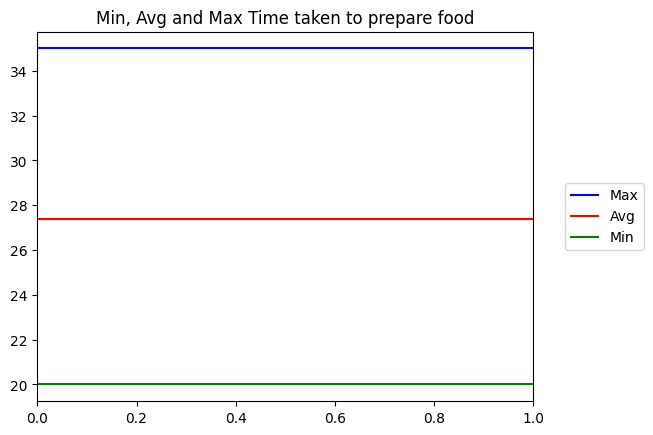

In [556]:
# Below code is to calculate the min , max and mean time taken
min_time = df['food_preparation_time'].min()
max_time = df['food_preparation_time'].max()
avg_time = df['food_preparation_time'].mean()

#We are using axhline to view our dataset in the form of graph
plt.axhline(max_time, color='b', linestyle='-', label='Max')
plt.axhline(avg_time, color='r', linestyle='-', label='Avg')
plt.axhline(min_time, color='g', linestyle='-', label='Min')
plt.title('Min, Avg and Max Time taken to prepare food')

# This includes legend to our graph
plt.legend(loc='center left',bbox_to_anchor=(1.05, 0.5))
print("Min Time Taken:" , min_time , "\nMax Time Taken:" , max_time, "\nAvg Time Taken:" , round(avg_time, 2 ))


#### Observations:
* We need to identify the min, max and Avg statistics the time taken to prepare the food.
* Based on the above output we can see the min time is 20, Avg time taken is 27.37 and max time taken is 35.
* The graph representation shows us the amount of time taken for each category.

### **Question 5:** How many orders are not rated?

The count of orders not rated =  736


Text(0.5, 1.0, 'Order Count based on Ratings ')

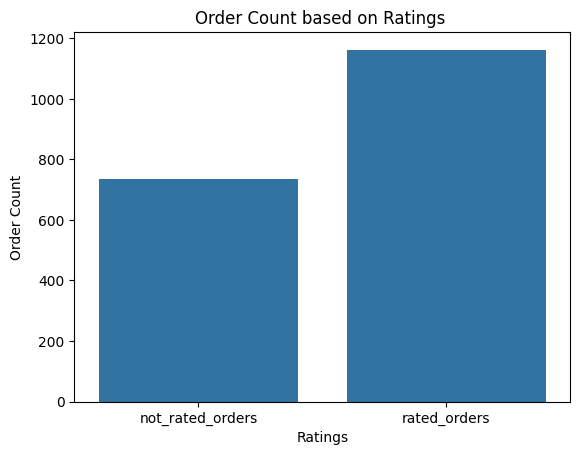

In [581]:
# We are using conditional filter to identify the orders without ratings
not_rated_orders = (df['rating'] == 'Not given').sum()
rated_orders = (df['rating'] != 'Not given').sum()
x = [not_rated_orders, rated_orders]
y = ['not_rated_orders', 'rated_orders']
data_value = pd.DataFrame({'x': x, 'y': y})
print("The count of orders not rated = ", not_rated_orders)
sns.barplot(data = data_value, x= 'y', y = 'x' )
plt.xlabel('Ratings')
plt.ylabel('Order Count')
plt.title('Order Count based on Ratings ')

#### Observations:
* The above results shows us the orders which are not rated .
* Therefore we can infer that out of 1898 orders 736 orders are not rated which is about 38.7 % not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [515]:
#Unique Orders and customers are
unique_orders = df['order_id'].nunique()
unique_customers = df['customer_id'].nunique()
print(f" Unique Order id count is: {unique_orders} \n Unique Customer id count is: {unique_customers} ")

 Unique Order id count is: 1898 
 Unique Customer id count is: 1200 


In [516]:
#Calculate unique restaurant_names
unique_restaurants = df['restaurant_name'].value_counts()
print(f"Unique restaurants count is {df['restaurant_name'].nunique()} and the names are: \n {unique_restaurants.index}")

Unique restaurants count is 178 and the names are: 
 Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway',
       'RedFarm Hudson', 'TAO', 'Han Dynasty', 'Blue Ribbon Sushi Bar & Grill',
       ...
       'Rohm Thai', 'Dig Inn Seasonal Market', 'Socarrat Paella Bar',
       'Alidoro', 'Cipriani Le Specialita', 'Sushi Choshi', 'Dos Caminos Soho',
       'La Follia', 'Philippe Chow', ''wichcraft'],
      dtype='object', name='restaurant_name', length=178)


Text(0.5, 1.0, 'Cost of Orders across diff Cuisine')

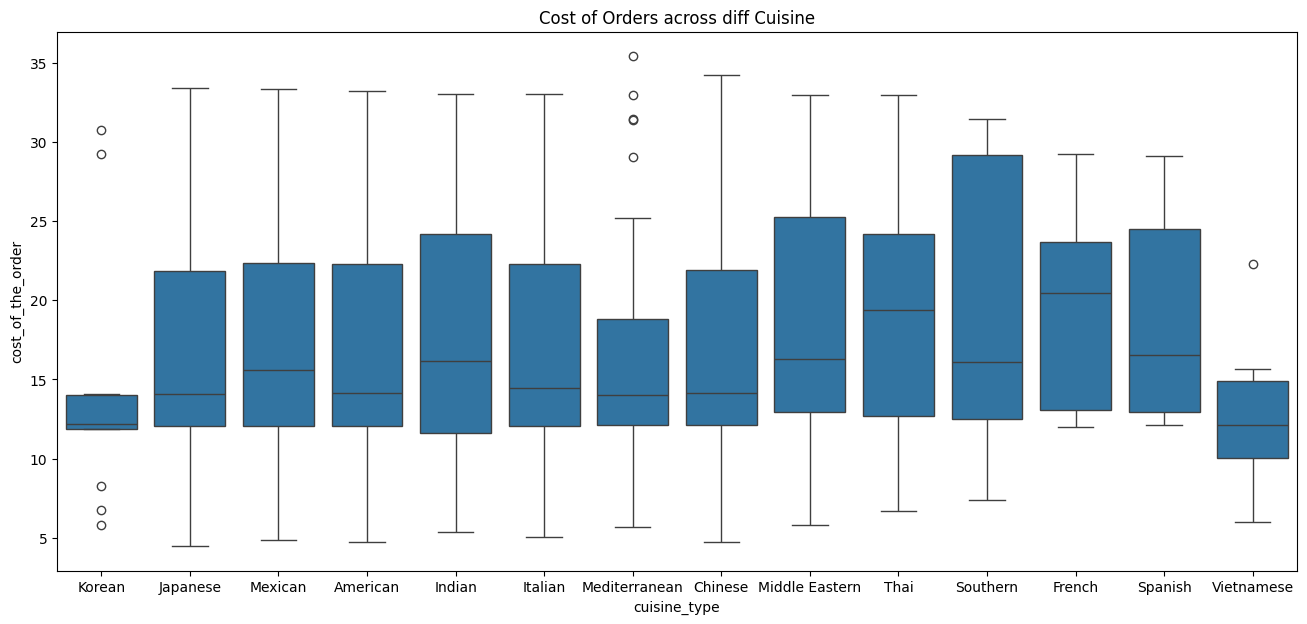

In [555]:
# We are replacing '4Not given5Not given', 'Not given' to NAN to make numerical calculations
df1 = df.copy()
df1['rating'] = df1['rating'].replace(['4Not given5Not given', 'Not given'], np.nan)
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')

df1
# Box Plot for Order Costs and cuisine type
plt.figure(figsize=(16,7))
sns.boxplot(data = df1, y= 'cost_of_the_order', x = 'cuisine_type' )
plt.title('Cost of Orders across diff Cuisine')

Text(0.5, 1.0, 'Cost of Orders across diff ratings')

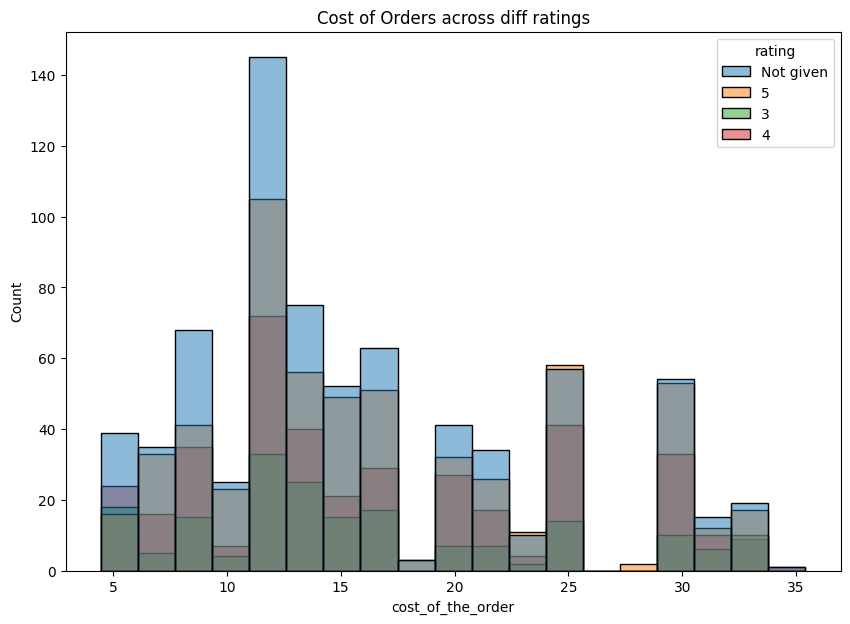

In [557]:
#Histogram for cost of order and ratings
plt.figure(figsize=(10,7))
sns.histplot(data = df, x= 'cost_of_the_order', hue = 'rating')
plt.title('Cost of Orders across diff ratings')

Text(0.5, 1.0, 'food preparation time Graph')

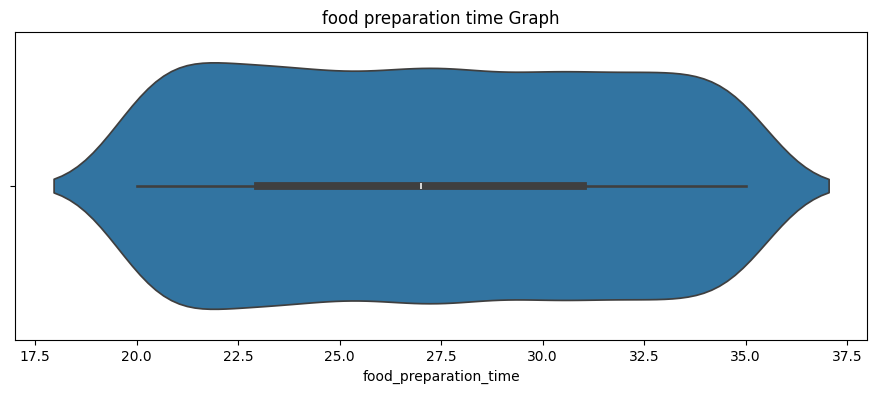

In [554]:
#Violin Plot to Identify food_preparation_time
plt.figure(figsize=(11,4))
sns.violinplot(data=df1, x='food_preparation_time');
plt.title('food preparation time Graph')

Text(0.5, 1.0, 'Delivary Time Graph')

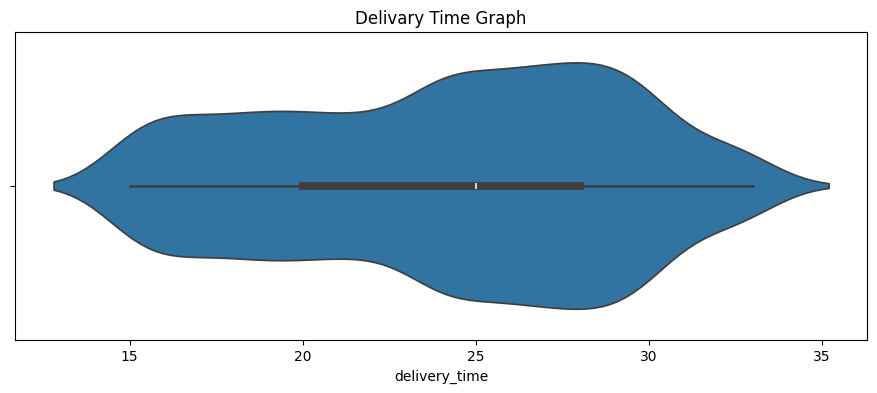

In [553]:
#Violin Plot to Identify food_delivary_time
plt.figure(figsize=(11,4))
sns.violinplot(data=df1, x='delivery_time');
plt.title('Delivary Time Graph')

Text(0.5, 1.0, 'Customer Count by Weekday vs Weekend')

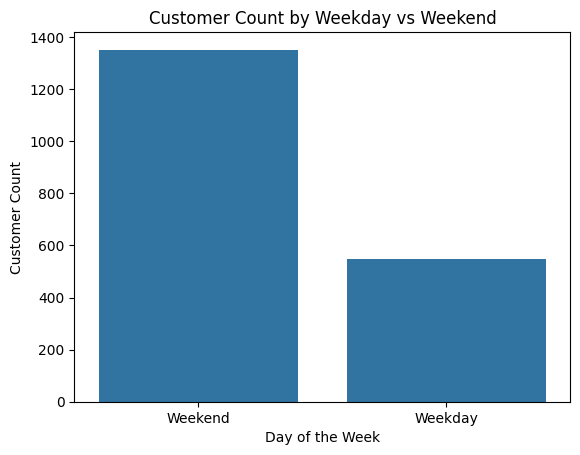

In [551]:
#Calculate customers during the weekday and weekend
sns.countplot(data=df1, x='day_of_the_week')
plt.xlabel('Day of the Week')
plt.ylabel('Customer Count')
plt.title('Customer Count by Weekday vs Weekend')


#### Observations:
* We have used Univariate Plots to understand each column in the table.
* From the above data we can infer that number of unique orders is greater than number of customers, from this we can infer that there are loyal customers for some restaurants.
* From the boxplot we were able to infer that mediterranean and Korean cuisine has more outliers with respect to the cost of each order.
* The Histplot gives us the cost of each item based on its rating.
* The violin plot gives us the median delivery time and food preparations time for the items. Food preparation time is uniform between 21~ and 33~ and delivary time is greater between 24~ and 37~.
* And the final bar graph gives us the comparison between the days of the week and the customers visit, were we can conclude that number of customers during the weekend is greater than the weekday.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

The top 5 restaurants in terms of the number of orders received are below: 
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


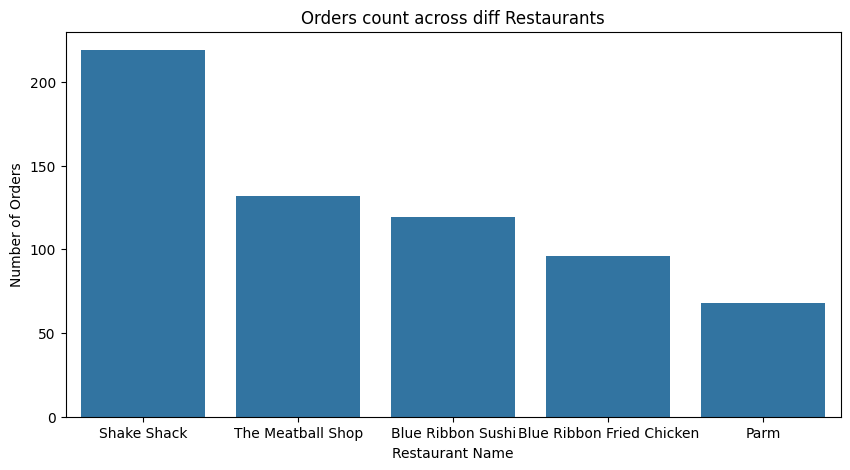

In [558]:
# Top 5 reataurants we are limiting the top 5 based on the count of orders 
max_orders = df['restaurant_name'].value_counts().head(5)

#We are using bar plot to plot the Restaurants and its order count
plt.figure(figsize=(10,5))
plt.xlabel('Restaurant Name', fontsize=10)
plt.ylabel('Number of Orders', fontsize=10)
sns.barplot( x = max_orders.index , y = max_orders.values )
plt.title('Orders count across diff Restaurants')
print("The top 5 restaurants in terms of the number of orders received are below:" , '\n', max_orders)

#### Observations:
* From the above graph we can infer the top 5 restaurants in the company .
* We are using the Head function to limit the Top 5 restaurants.
* As the value_counts function provides the results in desc order we do not need to sort the order.

### **Question 8**: Which is the most popular cuisine on weekends?

The most popular cuisine on weekends is **American**


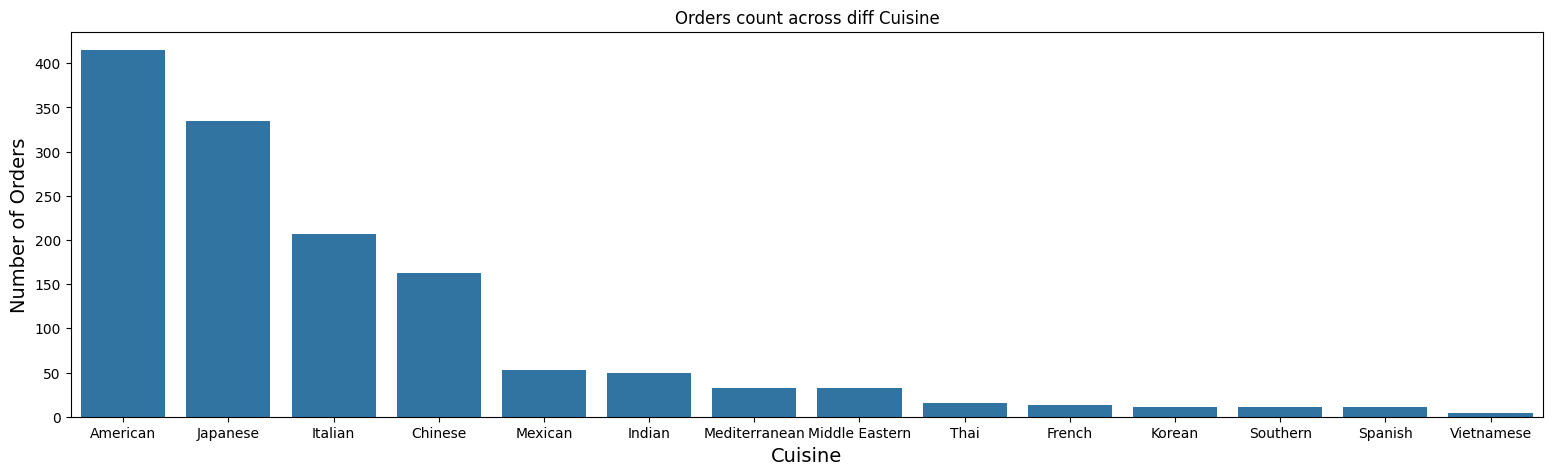

In [559]:
# Conditional filters to limit the data based on the req

orders_on_weekend = (df[df['day_of_the_week'] == 'Weekend'] )
popular_cuisine = orders_on_weekend['cuisine_type'].value_counts()
#popular_cuisine = orders_on_weekend.groupby('cuisine_type')['order_id'].count().head(3)

# Bar Graph to plot the num of orders for different cuisine
plt.figure(figsize=(19,5))
sns.barplot(x = popular_cuisine.index , y = popular_cuisine.values )
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.title('Orders count across diff Cuisine')

print(f"The most popular cuisine on weekends is **{popular_cuisine.head(1).index[0]}**")


#### Observations:
* The above graph clearly shows us the the Top restaurant with max order during the weekends.
* Top restaurant is American during weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [131]:
# Conditional filters to limit the data based on the req
cost_greater_than_20 = (df['cost_of_the_order'] > 20).sum()
Total_orders = len(df)

#Percentage Calculation
Percent_of_orders  = (cost_greater_than_20/Total_orders) * 100
print(f"{round(Percent_of_orders,2)}% of orders have a cost greater than $20")


29.24% of orders have a cost greater than $20


#### Observations:
* from the above calculation we can infer that 29.24% of orders cost greater than 20$.
* We are calculating this based on the numnber of orders received.

### **Question 10**: What is the mean order delivery time?

24.16 is the mean order delivery time for all the orders


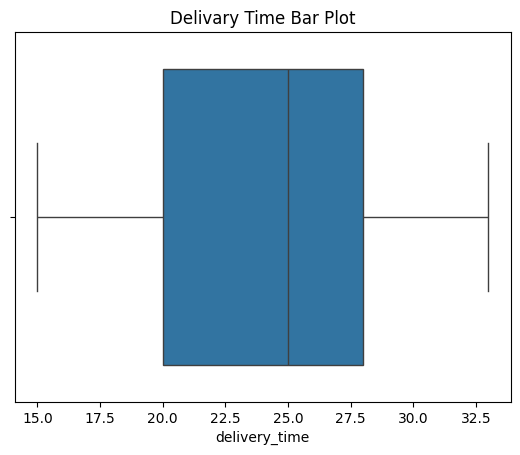

In [560]:
# Mean Calculation for order delivery
mean_deliv_time = df['delivery_time'].mean()
mean_deliv_time

#Box Plot Graph
sns.boxplot(data=df, x='delivery_time');
plt.title('Delivary Time Bar Plot')
print(f"{round(mean_deliv_time,2)} is the mean order delivery time for all the orders")

#### Observations:
* From the boxplot and also from the mean calculation we can clearly infer that the mean time taken is ~24.
* To retrieve the approx we need to use the mean function.
* We can also use violinplot to identify the mean.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

 The top 3 most frequent customers and their num of orders **customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64**


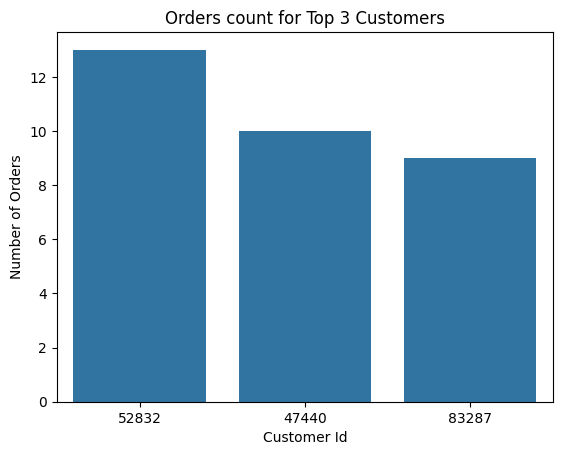

In [561]:
# Top 3 customer calculation
top_freq_customer = df['customer_id'].value_counts().head(3)
top_freq_customer

#Bar Plot 
plt.xlabel('Customer Id', fontsize=10)
plt.ylabel('Number of Orders', fontsize=10)
plt.title('Orders count for Top 3 Customers')
sns.barplot( x = top_freq_customer.index , y = top_freq_customer.values, order = top_freq_customer.index )
print(f" The top 3 most frequent customers and their num of orders **{top_freq_customer}**")

#### Observations:
* From the above data we can identify that customers 52832, 47440, 83287 are the top 3 customers.
* The 20% discount vouchers will be provided to these 3 customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

Text(0.5, 1.0, 'Pair Plot for different numerical values with days of the week filter')

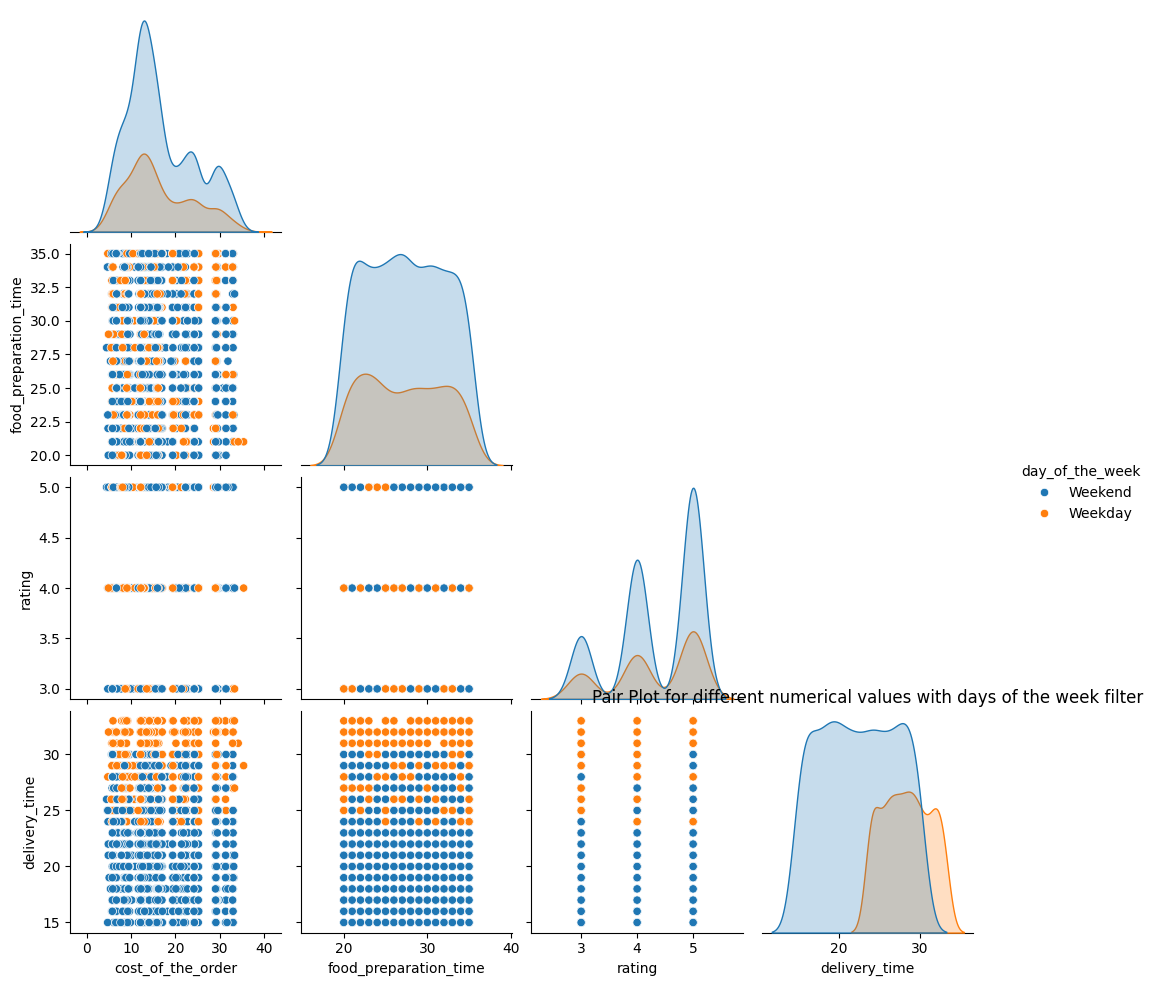

In [564]:
# Par Plot with hue as day_of_the_week
df1
sns.pairplot(data=df1, vars=['cost_of_the_order', 'food_preparation_time', 'rating', 'delivery_time'], hue='day_of_the_week', corner=True, );
plt.title('Pair Plot for different numerical values with days of the week filter')

Text(0.5, 1.0, 'Pair Plot for different numerical values with cuisine filter')

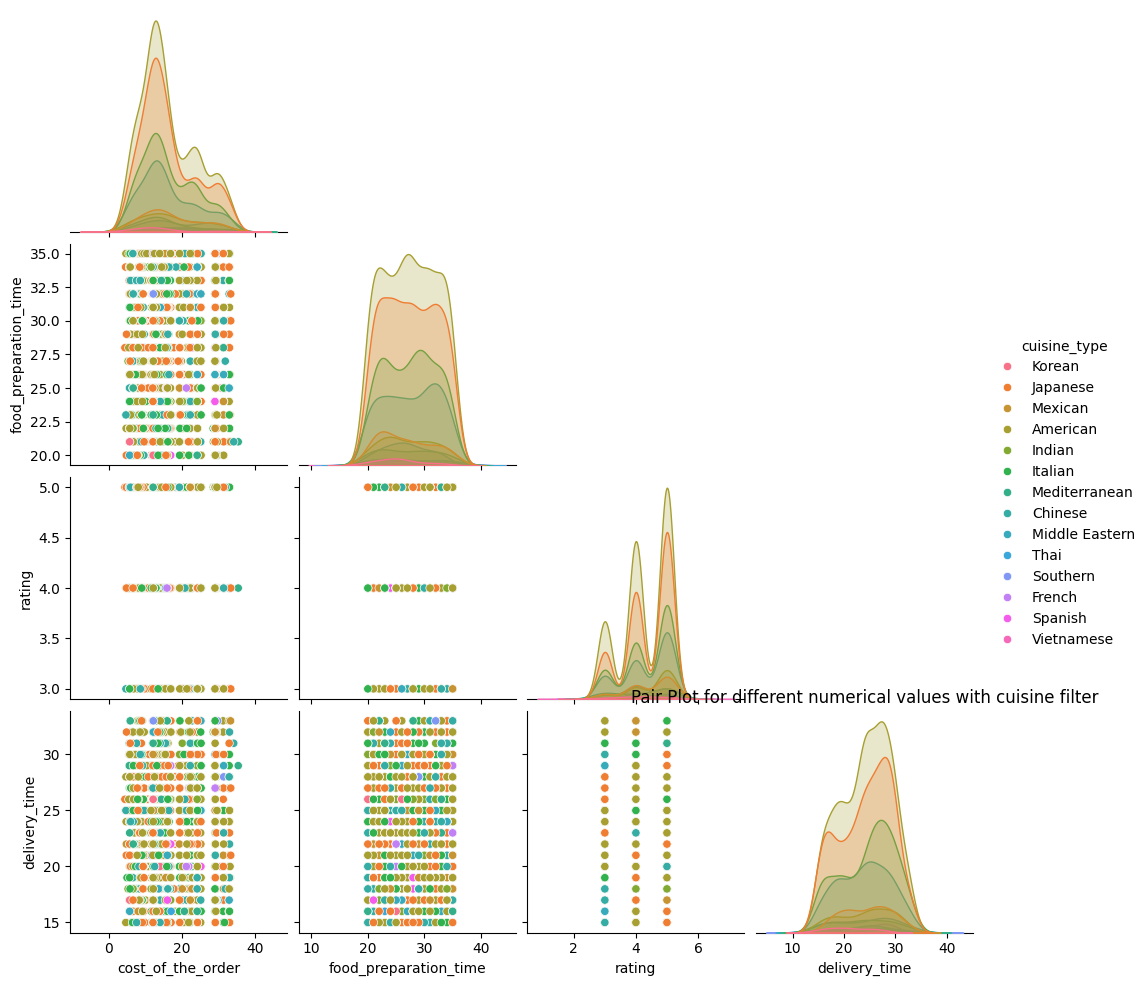

In [565]:
# Par Plot with hue as cuisine_type
sns.pairplot(data=df1, vars=['cost_of_the_order', 'food_preparation_time', 'rating', 'delivery_time'], hue='cuisine_type', corner=True, );
plt.title('Pair Plot for different numerical values with cuisine filter')

Text(0.5, 1.0, 'Heat Map for different numerical values')

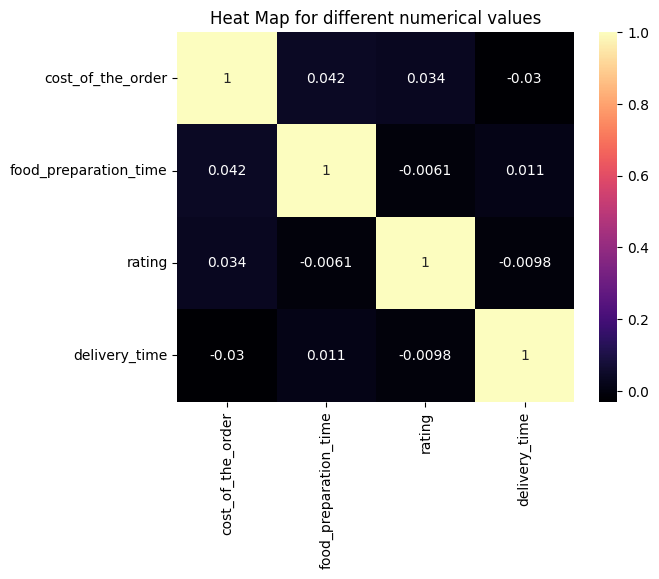

In [566]:
#Heat Map
sns.heatmap(data=df1[['cost_of_the_order','food_preparation_time', 'rating', 'delivery_time']].corr(), annot=True, cmap='magma');
plt.title('Heat Map for different numerical values')

#### Observations:
* The Multivariate graphs are once which have more than 2 variable in the plot.
* We have Pair Plot created with days_of the week and cuisine_type filter here we are able to see values mapping across different variables with that specific filter.
* For better visualization its best to keep hue dataset smaller.
* Next we have heat map which shows us the combination of different variables and their values.
* This helps us best undersand the relation between all of the numeric variables.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

 restaurants fulfilling the criteria to get the promotional offer are ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken']


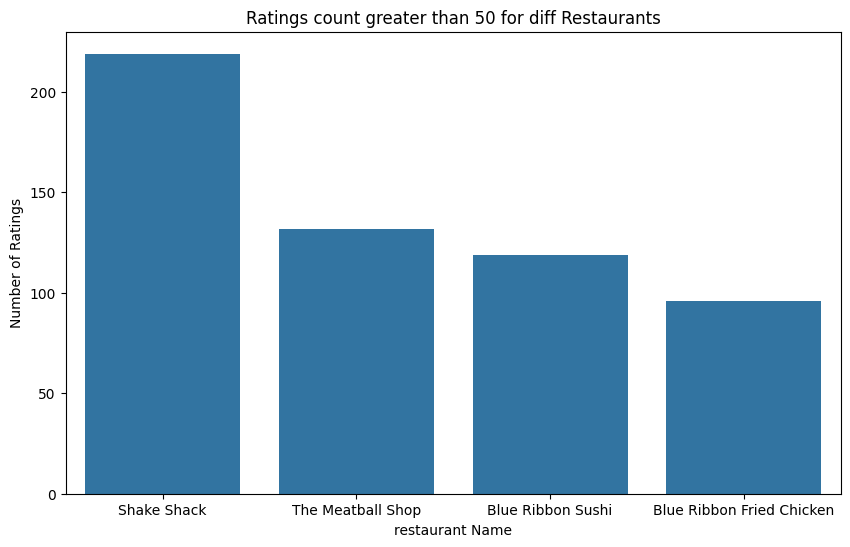

In [562]:
# Defining '4Not given5Not given', 'Not given' to NaN in order to perform numerical calculation
df1 = df.copy()
df1['rating'] = df1['rating'].replace(['4Not given5Not given', 'Not given'], np.nan)
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')

# Filtering out the dataset which is not satisfing the condition
promotional_restaurants = df1.groupby('restaurant_name').filter(lambda x: (x['rating'].dropna().count() > 50) & (x['rating'].dropna().mean() > 4))

promotional_restaurants.reset_index().to_string(index=True)
restaur_with_cond = promotional_restaurants['restaurant_name'].value_counts()

# Bar Plot to identify the rating count for different restaunants 
plt.figure(figsize=(10,6))
sns.barplot( x = restaur_with_cond.index , y = restaur_with_cond.values, order = restaur_with_cond.index )
plt.xlabel('restaurant Name', fontsize=10)
plt.ylabel('Number of Ratings', fontsize=10)
plt.title('Ratings count greater than 50 for diff Restaurants')
print(f" restaurants fulfilling the criteria to get the promotional offer are {restaur_with_cond.index.tolist()}")


#### Observations:
* From the above dataset we can identify that there are 4 restaurants with rating count greater than 50 and mean rating is greater than 4.
* We can also observe that 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' will be getting this promotional offers provided by the company.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [544]:
# Calculating company charges based on order price
df3 = df.copy()
costly_orders = (df[df['cost_of_the_order'] > 20] )
cheap_orders = (df[(df['cost_of_the_order'] > 5) & (df1['cost_of_the_order'] <= 20)] )
no_charges = (df[df['cost_of_the_order'] <= 5] )
costly_orders['net_rev'] = costly_orders['cost_of_the_order'] *(0.25)
cheap_orders['net_rev']  = cheap_orders['cost_of_the_order'] *(0.15)
no_charges['net_rev']  = no_charges['cost_of_the_order']

#Calculating total revenue based on each category
costly_orders_net_rev = costly_orders['net_rev'].sum() 
cheap_orders_net_rev = cheap_orders['net_rev'].sum() 

# Final net revenue
total_revenue =  round(costly_orders_net_rev,2) + round(cheap_orders_net_rev,2) 

print(f" The net revenue generated by the company across all orders is ${round(total_revenue,2)}")


 The net revenue generated by the company across all orders is $6166.31


#### Observations:
* Based on 25% and 15% revenue for the orders cost having greater than 20 and 5 dollers respectively.
* We are able to infer that company net revenue is $6166.31.
  

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [335]:
# Calculating total time taken from oder being placed to delivered
df2 = df1.copy()
df2['total_time_required_to_deliver'] = df2['food_preparation_time'] + df2['delivery_time']
df2
total_time_filt = (df2[df2['total_time_required_to_deliver'] > 60] )
total_time_filt.reset_index()

#Total time taken
act_count = len(df)

# time taken for orders greater than 60 mins
total_time_filt_count = len(total_time_filt)

#Percentage calculation
total_time_filt_perc = (total_time_filt_count/act_count) * 100
total_time_filt_perc
print(f"{round(total_time_filt_perc,2)}% is the percentage of orders which take more than 60 minutes to get delivered from the time the order is placed")

10.54% is the percentage of orders take more than 60 minutes to get delivered from the time the order is placed


#### Observations:
* From the above data we are able to idendity that the orders taking more than 60 mis from the order being prepared and delivered is 10.54%.
* All other orders take less than 60mins to prepare and deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

 Mean time diff between weekend and weekday is 5.87 where weekday deliv time: 28.34  > weekend deliv time 22.47 


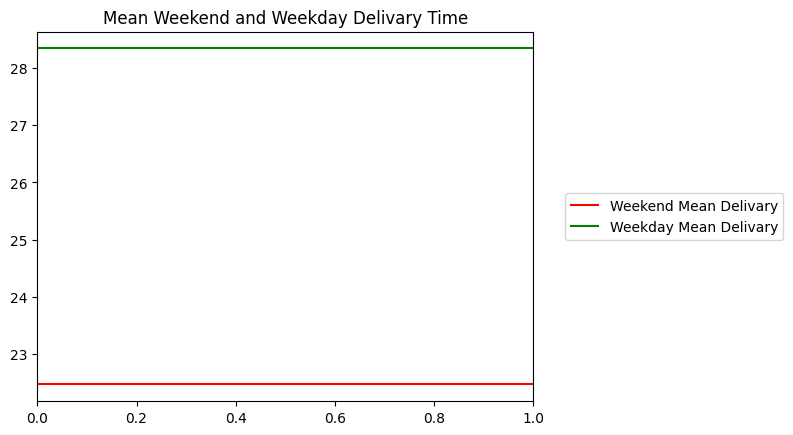

In [563]:
# Delivary time Calculation on weekdays and weekends
orders_on_weekend = (df[df['day_of_the_week'] == 'Weekend'] )
orders_on_weekday = (df[df['day_of_the_week'] == 'Weekday'] )
weekend_delivary_time = orders_on_weekend['delivery_time'].mean()
weekday_delivary_time = orders_on_weekday['delivery_time'].mean()

# Graph to show mean delivary time
plt.axhline(weekend_delivary_time, color='r', linestyle='-', label='Weekend Mean Delivary')
plt.axhline(weekday_delivary_time, color='g', linestyle='-', label='Weekday Mean Delivary')

# To include legend
plt.legend(loc='center left',bbox_to_anchor=(1.05, 0.5))
plt.title('Mean Weekend and Weekday Delivary Time')
deliv_time_diff = round(weekday_delivary_time - weekend_delivary_time, 2)
print(f" Mean time diff between weekend and weekday is {deliv_time_diff} where weekday deliv time: {round(weekday_delivary_time, 2)}  > weekend deliv time {round(weekend_delivary_time, 2)} ")


#### Observations:
* From the above dataset we can infer that the mean delivary time is greater during the Weenends than Weekdays.
* The mean time difference is 5.87 mins where weekends take 5.87 mins more than the weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  From the above analyses we are able to identify how the cost, delivary time can impact the rating of the restaurant.
*  We can also see how there are more customers for specific cuisine.
*  Also we can infer that how no ratings can affect the restaurants.
*  Also the charges the company gets from the restaurant.
We are able to identify the outliers and what changes the company needs to take in order to improve the revenue of the company.

### Recommendations:
Listing Few recomendations to the restaurant.

*  We can also start encoraging the customers to provide ratings and feedback as we have more number of orders without rating.
*  By providing discounts during weekdays we can attract more customers.
*  We can also start providing offers for low performing cuisines and restaurants.
*  We can also start introducing fusion restarunt for low performing restaurants .
*  Based on the above datset we can improve the company performance by increasing the restaurant chanres based on the popularity of the restaurants.

---